## ML PRE-REQUISITE TEST

### Question 1:
On performing matrix multiplication between between a (n, k) and (k, m) matrix, the result will be a matrix R of dimension (n,m).
Each element in the matrix R will be the sum of k products of elements of both the matrices. Therefore, the total no of multiplications is **n×m×k**. So for n×m×k multiplications, we need **n×m×(k-1)** additions.

### Question 2

In [37]:
import time

def matrix_multiply_list(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])

    C = []
    for i in range(m):
      C.append([0 for i in range(m)])

    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]
    return C

A = [[7, 2], [1, 6], [1, 9]]
B = [[7, 4, 9], [15, 19, 10]]

start = time.time()
R = matrix_multiply_list(A, B)
end = time.time()
list_time = end - start

print("Result obtained using list of lists:", R)
print("Time taken using list of lists:", list_time)


Result obtained using list of lists: [[79, 66, 83], [97, 118, 69], [142, 175, 99]]
Time taken using list of lists: 0.00010180473327636719


In [38]:
import numpy as np

A = np.array(A)
B = np.array(B)

start = time.time()
R_np = np.dot(A, B)
end = time.time()
numpy_time = end - start

print("Result using NumPy:", R_np)
print("Time taken using NumPy:", numpy_time)


Result using NumPy: [[ 79  66  83]
 [ 97 118  69]
 [142 175  99]]
Time taken using NumPy: 0.0006651878356933594


In [39]:
# Comparing timings
print(f"Time taken using List of lists implementation: {list_time}s")
print(f"Time taken using NumPy implementation took: {numpy_time}s")


Time taken using List of lists implementation: 0.00010180473327636719s
Time taken using NumPy implementation took: 0.0006651878356933594s


The time taken using NumPy is faster than the List of lists method as it uses Vectorization for faster calculations.
The difference between the time taken in both the methods as the size of the matrix grows larger.

### Question 3:
The time complexity on using the method given in the question would be O(n**2) as it would loop over the length of the list n//2 times.
The time complexity can improved to O(n logn) by sorting the list and accessing the n//2th element which is O(1).

In [40]:
import numpy as np
import time

def median_multiple_passes(arr):
    n = len(arr)
    for i in range(n // 2):
        max_element = max(arr)
        arr.remove(max_element)
    median = max(arr)
    return median

def median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2

def median_numpy(arr):
    return np.median(arr)

arr = np.random.randint(0, 10000, size=1000)

start_time = time.time()
multiple_passes_result = median_multiple_passes(arr.copy().tolist())
t_multiple_passes = time.time() - start_time

start_time = time.time()
sorting_result = median_sorting(arr.copy().tolist())
t_sorting = time.time() - start_time

start_time = time.time()
numpy_result = median_numpy(arr.copy())
t_numpy = time.time() - start_time


print(f"Multiple passes: {multiple_passes_result}, Time taken: {t_multiple_passes:.6f} seconds")
print(f"Sorting: {sorting_result}, Time taken: {t_sorting:.6f} seconds")
print(f"NumPy: {numpy_result}, Time taken: {t_numpy:.6f} seconds")


Multiple passes: 4922, Time taken: 0.013481 seconds
Sorting: 4927.0, Time taken: 0.000267 seconds
NumPy: 4927.0, Time taken: 0.000224 seconds


### Question 4:

Lets take f(x,y) = (x**2)*y + (y**3)*sinx
                                   
=> df/dx = 2xy +  (y**3)*cosx

and

df/dy = (x**2) + 3(y**2)*sinx

### Question 5:

In [41]:
pip install jax

In [45]:
import jax.numpy as jnp
from jax import grad
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

g_x = grad(f, argnums=0)
g_y = grad(f, argnums=1)


def original_g_f(x, y):
    g_x = 2 * x * y + y**3 * jnp.cos(x)
    g_y = x**2 + 3 * y**2 * jnp.sin(x)
    return g_x, g_y


values = [
    (3.0, 9.0),
    (6.5, 3.5),
    (7.0, 6.0),
    (4.5, 1.5),
    (-6.0, 9.0)
]

for x, y in values:
    g_x_jax = g_x(x, y)
    g_y_jax = g_y(x, y)
    g_x_original, g_y_original = original_g_f(x, y)

    print(f"values: x = {x}, y = {y}")
    print(f"JAX gradient: (df/dx, df/dy) = ({g_x_jax}, {g_y_jax})")
    print(f"original gradient: (df/dx, df/dy) = ({g_x_original}, {g_y_original})")
    print(f"Difference: (df/dx, df/dy) = ({g_x_jax - g_x_original}, {g_y_jax - g_y_original})\n")


values: x = 3.0, y = 9.0
JAX gradient: (df/dx, df/dy) = (-667.7045288085938, 43.29216003417969)
original gradient: (df/dx, df/dy) = (-667.7045288085938, 43.29216003417969)
Difference: (df/dx, df/dy) = (0.0, 0.0)

values: x = 6.5, y = 3.5
JAX gradient: (df/dx, df/dy) = (87.37120056152344, 50.15565872192383)
original gradient: (df/dx, df/dy) = (87.37120056152344, 50.15565872192383)
Difference: (df/dx, df/dy) = (0.0, 0.0)

values: x = 7.0, y = 6.0
JAX gradient: (df/dx, df/dy) = (246.84288024902344, 119.95455169677734)
original gradient: (df/dx, df/dy) = (246.84288024902344, 119.95455169677734)
Difference: (df/dx, df/dy) = (0.0, 0.0)

values: x = 4.5, y = 1.5
JAX gradient: (df/dx, df/dy) = (12.78856372833252, 13.65167236328125)
original gradient: (df/dx, df/dy) = (12.78856372833252, 13.65167236328125)
Difference: (df/dx, df/dy) = (0.0, 0.0)

values: x = -6.0, y = 9.0
JAX gradient: (df/dx, df/dy) = (591.964111328125, 103.89796447753906)
original gradient: (df/dx, df/dy) = (591.964111328125,

### Question 6:

In [46]:
pip install sympy

In [47]:
import sympy as sp

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

g_x_sympy = sp.diff(f, x)
g_y_sympy = sp.diff(f, y)

print("Gradient w.r.t x:",g_x_sympy )
print("Gradient w.r.t x:",g_y_sympy )


Gradient w.r.t x: 2*x*y + y**3*cos(x)
Gradient w.r.t x: x**2 + 3*y**2*sin(x)


### Question 7

In [48]:
records = {
    2022: {
        "Branch 1": {
            1: {"Name": "Mustan", "Marks": {"Maths": 100, "English": 99}},
            2: {"Name": "Rohit", "Marks": {"Maths": 90, "English": 80}},
        },
        "Branch 2": {
            3: {"Name": "Nikhil", "Marks": {"Maths": 99, "English": 99}},
            4: {"Name": "Vedant", "Marks": {"Maths": 95, "English": 85}},
        },
    },
    2023: {
        "Branch 1": {
            5: {"Name": "Bundel", "Marks": {"Maths": 88, "English": 78}},
            6: {"Name": "Chinmay", "Marks": {"Maths": 99, "English": 82}},
        },
        "Branch 2": {
            7: {"Name": "Aarav", "Marks": {"Maths": 89, "English": 79}},
            8: {"Name": "Priyanka", "Marks": {"Maths": 91, "English": 81}},
        },
    },
    2024: {
        "Branch 1": {
            9: {"Name": "Navin", "Marks": {"Maths": 97, "English": 77}},
            10: {"Name": "Priya", "Marks": {"Maths": 93, "English": 83}},
        },
        "Branch 2": {
            11: {"Name": "More", "Marks": {"Maths": 86, "English": 76}},
            12: {"Name": "Surriya", "Marks": {"Maths": 94, "English": 84}},
        },
    },
    2025: {
        "Branch 1": {
            13: {"Name": "Prachand", "Marks": {"Maths": 90, "English": 80}},
            14: {"Name": "Aditya", "Marks": {"Maths": 88, "English": 78}},
        },
        "Branch 2": {
            15: {"Name": "Kevin", "Marks": {"Maths": 92, "English": 82}},
            16: {"Name": "Rocker", "Marks": {"Maths": 91, "English": 81}},
        },
    },
}


year = 2022
branch = "Branch 1"
roll_number = 1

student_info = records[year][branch][roll_number]
print(f"Name: {student_info['Name']}")
print("Marks:")
for subject, mark in student_info['Marks'].items():
  print(f"{subject}: {mark}")


Name: Mustan
Marks:
Maths: 100
English: 99


### Question 8:

In [51]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

db = Database()
year_2022 = Year(2022)
year_2023 = Year(2023)
year_2024 = Year(2024)
year_2025 = Year(2025)


branch1_2022 = Branch("Branch 1")
branch1_2022.add_student(Student(1, "Mustan", {"Maths": 100, "English": 99}))
branch1_2022.add_student(Student(2, "Rohit", {"Maths": 90, "English": 80}))
branch2_2022 = Branch("Branch 2")
branch2_2022.add_student(Student(3, "Nikhil", {"Maths": 99, "English": 99}))
branch2_2022.add_student(Student(4, "Vedant", {"Maths": 95, "English": 85}))
year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)

branch1_2023 = Branch("Branch 1")
branch1_2023.add_student(Student(5, "Bundel", {"Maths": 88, "English": 78}))
branch1_2023.add_student(Student(6, "Chinmay", {"Maths": 99, "English": 82}))
branch2_2023 = Branch("Branch 2")
branch2_2023.add_student(Student(7, "Aarav", {"Maths": 89, "English": 79}))
branch2_2023.add_student(Student(8, "Priyanka", {"Maths": 91, "English": 81}))
year_2023.add_branch(branch1_2023)
year_2023.add_branch(branch2_2023)


branch1_2024 = Branch("Branch 1")
branch1_2024.add_student(Student(9, "Navin", {"Maths": 97, "English": 77}))
branch1_2024.add_student(Student(10, "Priya", {"Maths": 93, "English": 83}))
branch2_2024 = Branch("Branch 2")
branch2_2024.add_student(Student(11, "More", {"Maths": 86, "English": 76}))
branch2_2024.add_student(Student(12, "Surriya", {"Maths": 94, "English": 84}))
year_2024.add_branch(branch1_2024)
year_2024.add_branch(branch2_2024)


branch1_2025 = Branch("Branch 1")
branch1_2025.add_student(Student(13, "Prachand", {"Maths": 90, "English": 80}))
branch1_2025.add_student(Student(14, "Aditya", {"Maths": 88, "English": 78}))
branch2_2025 = Branch("Branch 2")
branch2_2025.add_student(Student(15, "Kevin", {"Maths": 92, "English": 82}))
branch2_2025.add_student(Student(16, "Rocker", {"Maths": 91, "English": 81}))
year_2025.add_branch(branch1_2025)
year_2025.add_branch(branch2_2025)


db.add_year(year_2022)
db.add_year(year_2023)
db.add_year(year_2024)



def get_student_info(year, branch_name, roll_number):
    for y in db.years:
        if y.year == year:
            for br in y.branches:
                if br.name == branch_name:
                    for student in br.students:
                        if student.roll_number == roll_number:
                            return student
    return None

year = 2022
branch_name = "Branch 1"
roll_number = 1

student_info = get_student_info(year, branch_name, roll_number)
if student_info:
    print(f"Name: {student_info.name}")
    print("Marks:")
    for subject, mark in student_info.marks.items():
        print(f"{subject}: {mark}")
else:
    print("Student not found")

Name: Mustan
Marks:
Maths: 100
English: 99


### Question 9:

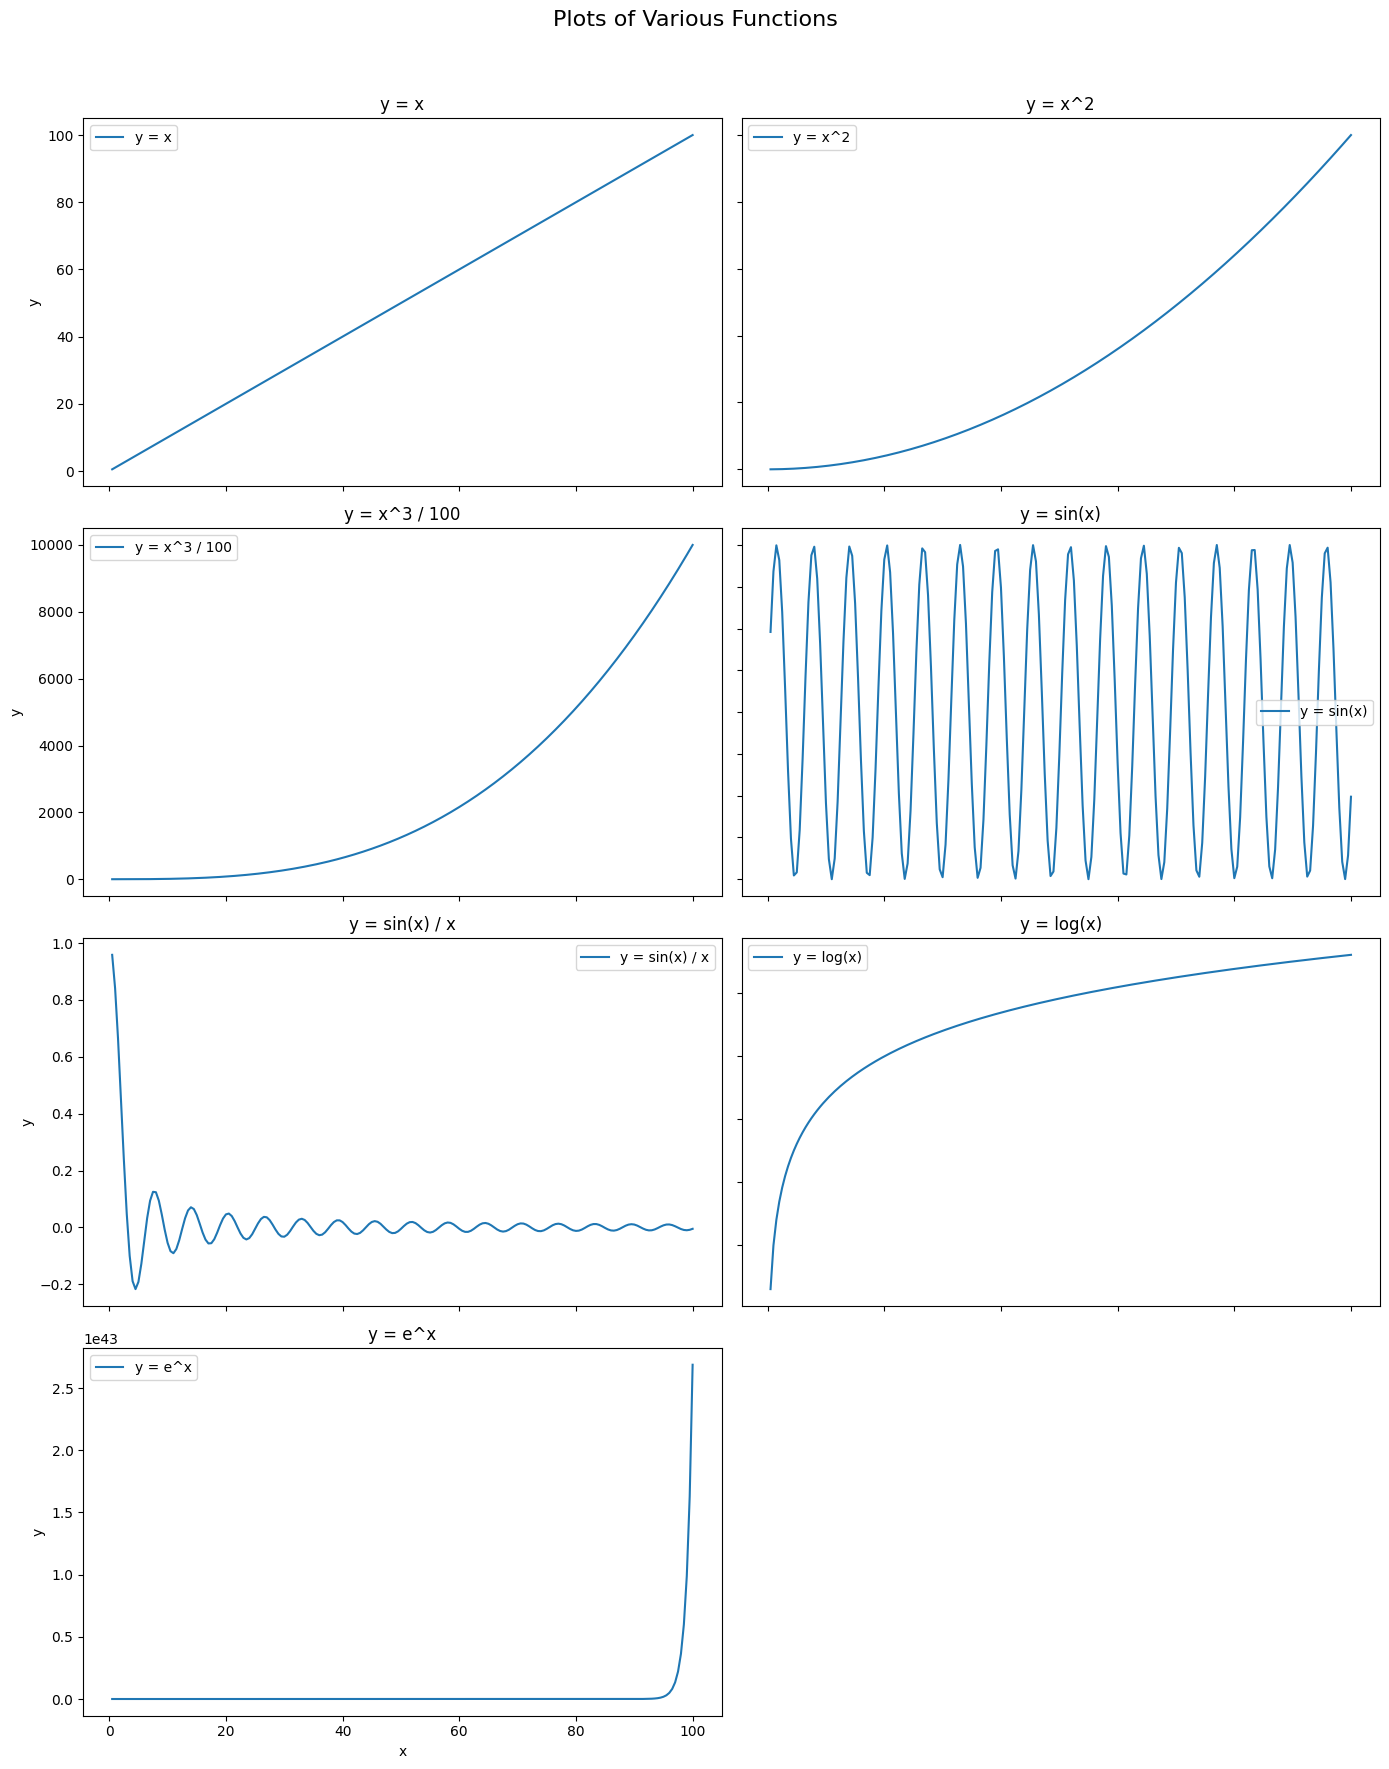

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

fig, axs = plt.subplots(4, 2, figsize=(14, 18))

axs[0, 0].plot(x, y1, label='y = x')
axs[0, 0].set_title('y = x')
axs[0, 0].legend()

axs[0, 1].plot(x, y2, label='y = x^2')
axs[0, 1].set_title('y = x^2')
axs[0, 1].legend()

axs[1, 0].plot(x, y3, label='y = x^3 / 100')
axs[1, 0].set_title('y = x^3 / 100')
axs[1, 0].legend()

axs[1, 1].plot(x, y4, label='y = sin(x)')
axs[1, 1].set_title('y = sin(x)')
axs[1, 1].legend()

axs[2, 0].plot(x, y5, label='y = sin(x) / x')
axs[2, 0].set_title('y = sin(x) / x')
axs[2, 0].legend()

axs[2, 1].plot(x, y6, label='y = log(x)')
axs[2, 1].set_title('y = log(x)')
axs[2, 1].legend()

axs[3, 0].plot(x, y7, label='y = e^x')
axs[3, 0].set_title('y = e^x')
axs[3, 0].legend()

axs[3, 1].axis('off')

for a in axs.flat:
    a.set(xlabel='x', ylabel='y')
    a.label_outer()

fig.suptitle('Plots of Various Functions', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




### Question 10:

In [52]:
import numpy as np
import pandas as pd
arr = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(arr, columns=["a", "b", "c", "d", "e"])
highest_std_column = df.std().idxmax()
print(f"The column with the highest standard deviation is: {highest_std_column}")
lowest_mean_row = df.mean(axis=1).idxmin()
print(f"The row with the lowest mean is: {lowest_mean_row}")
print(df)
print()
df.mean()


The column with the highest standard deviation is: c
The row with the lowest mean is: 10
           a         b         c         d         e
0   1.216579  1.872626  1.087109  1.487384  1.691416
1   1.261751  1.624241  1.829385  1.190337  1.917221
2   1.553559  1.299232  1.430858  1.312192  1.725111
3   1.796301  1.832937  1.985768  1.791284  1.601384
4   1.339220  1.544595  1.041068  1.744825  1.445956
5   1.020023  1.062507  1.387466  1.583422  1.464204
6   1.619204  1.480294  1.661704  1.219126  1.112843
7   1.596434  1.484690  1.026868  1.380482  1.106126
8   1.531357  1.395778  1.613152  1.805602  1.299669
9   1.962102  1.535635  1.618291  1.680672  1.666732
10  1.510971  1.428764  1.053782  1.022086  1.357961
11  1.333661  1.387695  1.138368  1.738168  1.856964
12  1.938715  1.492362  1.700866  1.855551  1.418291
13  1.309413  1.936725  1.515677  1.497254  1.178416
14  1.108155  1.842107  1.614133  1.325825  1.191736
15  1.555497  1.583919  1.206994  1.851406  1.084264
16  1.3560

a    1.492617
b    1.535260
c    1.436334
d    1.536062
e    1.460385
dtype: float64

### Question 11:

In [53]:
df['f'] = np.sum(arr,axis=1)
c_arr = np.array(df['f'] < 8 ).astype('int')
c_arr = list(c_arr)
for i in range(len(c_arr)):
  if c_arr[i] == 1:
    c_arr[i] = 'LT8'
  else:
    c_arr[i] = 'GT8'
c_arr
df['g'] = c_arr
print(df)
print()
print(f"Total no. of rows in dataframe having value LT8 in the column g: {np.sum(df['g']=='LT8')}")

print(f"Standard deviation in the case of LT8 is: {df[df['g'] == 'LT8']['f'].std()}")
print(f"Standard deviation in the case of GT8 is: {df[df['g'] == 'GT8']['f'].std()}")

           a         b         c         d         e         f    g
0   1.216579  1.872626  1.087109  1.487384  1.691416  7.355115  LT8
1   1.261751  1.624241  1.829385  1.190337  1.917221  7.822935  LT8
2   1.553559  1.299232  1.430858  1.312192  1.725111  7.320952  LT8
3   1.796301  1.832937  1.985768  1.791284  1.601384  9.007675  GT8
4   1.339220  1.544595  1.041068  1.744825  1.445956  7.115665  LT8
5   1.020023  1.062507  1.387466  1.583422  1.464204  6.517622  LT8
6   1.619204  1.480294  1.661704  1.219126  1.112843  7.093172  LT8
7   1.596434  1.484690  1.026868  1.380482  1.106126  6.594599  LT8
8   1.531357  1.395778  1.613152  1.805602  1.299669  7.645557  LT8
9   1.962102  1.535635  1.618291  1.680672  1.666732  8.463431  GT8
10  1.510971  1.428764  1.053782  1.022086  1.357961  6.373564  LT8
11  1.333661  1.387695  1.138368  1.738168  1.856964  7.454857  LT8
12  1.938715  1.492362  1.700866  1.855551  1.418291  8.405785  GT8
13  1.309413  1.936725  1.515677  1.497254  1.17

### Question 12:

In [54]:
import numpy as np

A = np.array([[4, 9, 3],
              [6, 9, 3],
              [7, 11, 9]])
B = np.array([10, 11, 12])
C = A + B
print(f"A:{A}")
print(f"\nArray B:{B}")
print("\nResult of A + B after broadcasting B:")
print(C)


A:[[ 4  9  3]
 [ 6  9  3]
 [ 7 11  9]]

Array B:[10 11 12]

Result of A + B after broadcasting B:
[[14 20 15]
 [16 20 15]
 [17 22 21]]


### Question 13:

In [55]:
import numpy as np

def arg_min(arr):
    min_value = arr[0]
    min_idx = 0
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_idx = i
    return min_idx

arr = np.random.rand(10)
print("Array:", arr)
custom_idx = arg_min(arr)
print("Custom argmin index:", custom_idx)
numpy_idx = np.argmin(arr)
print("Numpy index after using np.argmin:", numpy_idx)
print("Check whether the indices are matching:", custom_idx == numpy_idx)


Array: [0.53222287 0.82164157 0.10137984 0.79189132 0.811572   0.482274
 0.05731031 0.17458985 0.70742628 0.71177794]
Custom argmin index: 6
Numpy index after using np.argmin: 6
Check whether the indices are matching: True
